In [2]:
import sys
sys.path.insert(0, "/Users/aimachine/PyImage/utils")
import numpy as np
from scipy import signal
from scipy.fftpack import fftfreq
import matplotlib.pyplot as plt
import os
from scipy.signal import blackman
from tifffile import imread
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from Normalize import normalizeFloat, normalizeMinMax, Path, save_tiff_imagej_compatible

/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/aimachine/anaconda3/envs/tensorflowpy3pt5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [3]:
targetdir = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/'
sourceimage = '/Users/aimachine/Documents/JLMCurvature/FFTImageTest/FullResolution.tif'

base = os.path.split(sourceimage)[-1]

Filename = os.path.splitext(base)


In [4]:
#Enter time unit in seconds
Time_unit = 5
#Cut Section of image before the alst pixel
CutSectionAfter = 0
#Enter start y pixel unit for the section
StartSection = 0
#Enter end y pixel unit for section
EndSection = 70
#Range of Plot in Hertz
maxXrange = 0.1

745   122


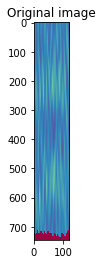

In [5]:
y = imread(sourceimage)
Xrange = y.shape[0]
Yrange = y.shape[1]
cutY = y[:,CutSectionAfter:Yrange]
y = cutY


print(Xrange, " ", Yrange)
width = int(EndSection - StartSection)
block = int(Xrange / width)

Start = StartSection
End = EndSection

axes = 'XY'

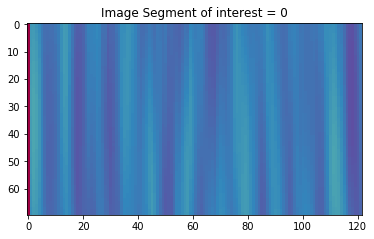

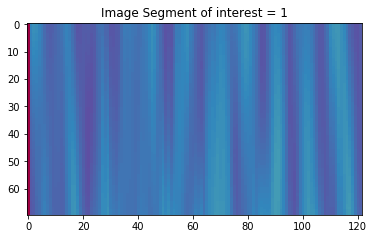

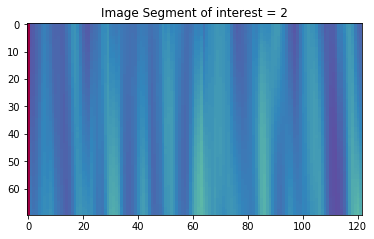

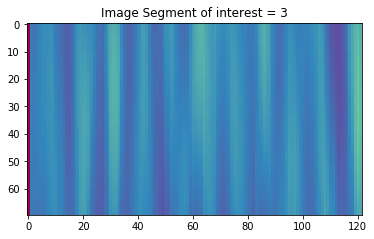

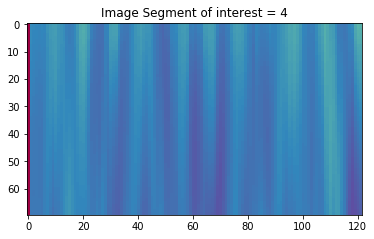

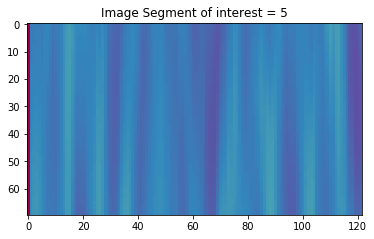

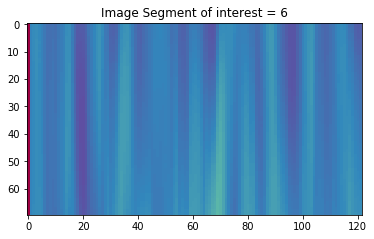

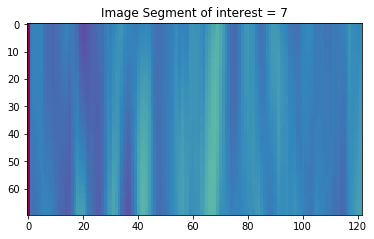

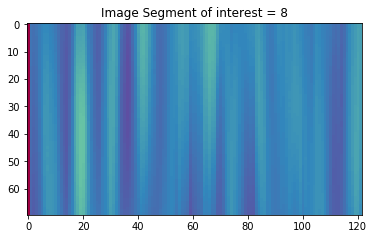

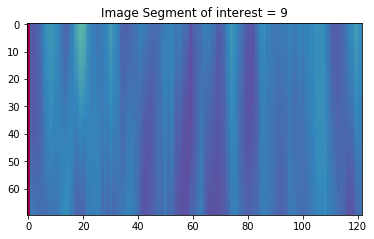

In [6]:

for i in range(block):
 plt.figure()
 
 fsmally = y[StartSection:EndSection, :]
 StartSection = EndSection
 EndSection += width
    
 plt.imshow(fsmally, plt.cm.Spectral)
 plt.title('Image Segment of interest' + ' = ' + str(i))

In [7]:
#FFT with filter
def doFilterFFT(image, block, filter):
   addedfft = 0 
   PointsSample = image.shape[1] 
   for i in range(image.shape[0]):
      if filter == True:   
       w = blackman(PointsSample)
      if filter == False:
       w = 1
      strip = image[i,:]
      fftresult = fft(w * strip)
      addedfft += np.abs(fftresult)  
   #addedfft/=image.shape[0]
   
   
   xf = fftfreq(PointsSample, Time_unit)
   
   
   return 2.0/PointsSample * addedfft[1:int(PointsSample//2)], xf[1:int(PointsSample//2)]

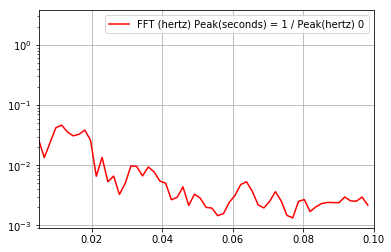

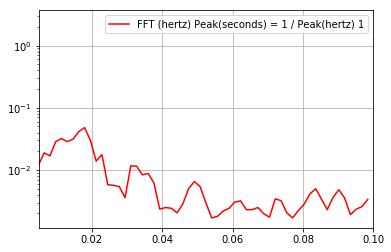

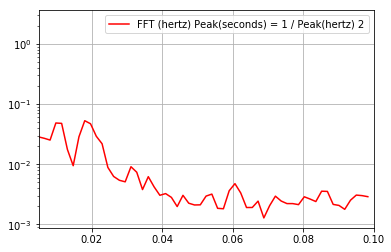

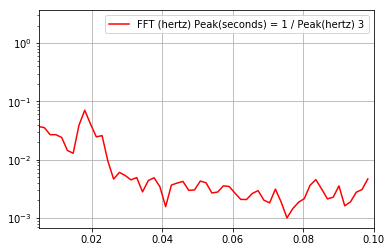

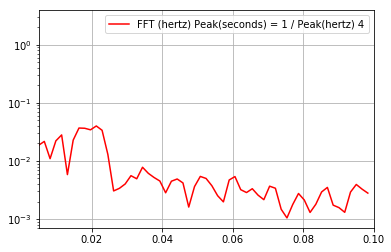

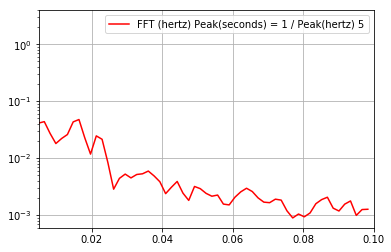

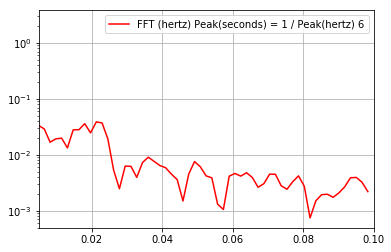

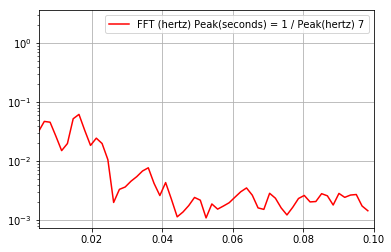

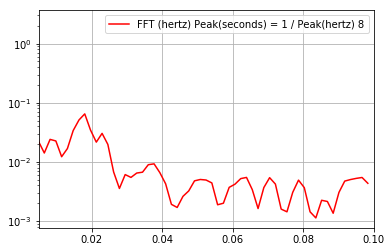

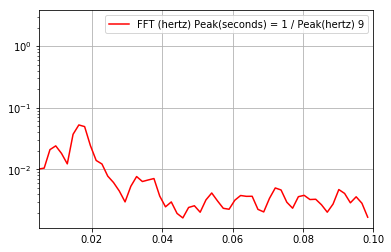

In [8]:

StartSection = Start
EndSection = End
allfrequ = 0
Block = np.zeros([block])
for i in range(block):
 
 fsmally = y[StartSection:EndSection, :]

    
 StartSection = EndSection
 EndSection += width    
 onedimg, frequ = doFilterFFT(fsmally, i, True)
 allfrequ+=onedimg
 plt.figure()
 plt.semilogy(frequ, onedimg, '-r' )
 plt.xlim(xmin = 0.005, xmax = maxXrange )
 plt.grid()
 plt.legend(['FFT (hertz) Peak(seconds) = 1 / Peak(hertz)' + ' ' + str(i)]) 
 plt.savefig(targetdir + 'Filtered' + Filename[0] + str(i) + '.png')
 
StartSection = Start
EndSection = End



83.33333333333333


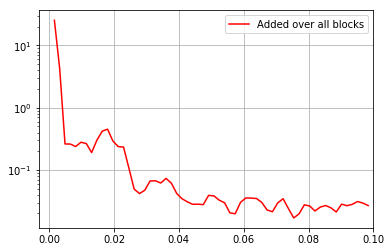

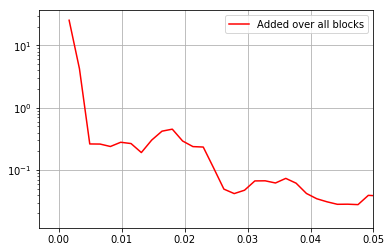

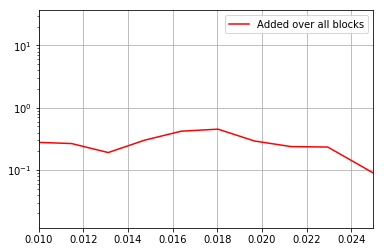

In [9]:
plt.figure()
plt.semilogy(frequ, allfrequ, '-r')
plt.xlim(xmax = maxXrange)
plt.grid()
plt.legend(['Added over all blocks']) 
plt.figure()
plt.semilogy(frequ, allfrequ, '-r')
plt.xlim(xmax = maxXrange / 2)
plt.grid()
plt.legend(['Added over all blocks']) 
plt.figure()
plt.semilogy(frequ, allfrequ, '-r')
plt.xlim(xmin = 0.01,xmax = maxXrange / 4)
plt.grid()
plt.legend(['Added over all blocks']) 
print(1/0.012)